<a href="https://colab.research.google.com/github/swastikbanerjee/DL_Lab/blob/main/dlLab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_path = '/content/drive/MyDrive/DATASETS/Lab5 Dataset'
cat_path = os.path.join(base_path, 'cat')
dog_path = os.path.join(base_path, 'dog')
goldfish_path = os.path.join(base_path, 'goldfish')
lizard_path = os.path.join(base_path, 'lizard')
woodpecker_path = os.path.join(base_path, 'woodpecker')

In [ ]:
print("Files in 'cat' folder:", os.listdir(cat_path))
print("Files in 'dog' folder:", os.listdir(dog_path))
print("Files in 'goldfish' folder:", os.listdir(goldfish_path))
print("Files in 'lizard' folder:", os.listdir(lizard_path))
print("Files in 'woodpecker' folder:", os.listdir(woodpecker_path))

Files in 'cat' folder: ['00357563a7.jpg', '094ac674a9.jpg', '0b54dde5f5.jpg', '11883c3dd8.jpg', '057e6db146.jpg', '0d0d6d90d8.jpg', '087d293433.jpg', '0c3d04bcf5.jpg', '124eecb74f.jpg', '029c926ce9.jpg', '0cfaf08fce.jpg', '15b23c04b7.jpg', '67dc417509.jpg', '4bd8b7789f.jpg', '5e07a0666d.jpg', '5a5cdbdc6b.jpg', '4c6ff6dae0.jpg', '32cd00f171.jpg', '3f3a2aaef2.jpg', '4815f8dfaa.jpg', '66548aefad.jpg', '1f016e1910.jpg', '34fb30ecc5.jpg', '354bb2acdf.jpg', '5aaea25f27.jpg', '612c521481.jpg', '3321ec48a8.jpg', '2a40de8365.jpg', '31ae8d36b6.jpg', '2d7dc1ddb5.jpg', '6296ca5ccf.jpg', '39ae72da61.jpg', '636b432421.jpg', '46af339620.jpg', '578d493138.jpg', '6128bd1a84.jpg', '1a2dce7848.jpg', '8af49688fa.jpg', '76273ddb00.jpg', '9e020b77ac.jpg', '9293137b5d.jpg', '71756f7bd0.jpg', '6fe978c917.jpg', '9d21019336.jpg', '72c56919f9.jpg', '84db062d1f.jpg', '81b58d7d07.jpg', '9fd544a838.jpg', '6a5e9eac29.jpg', '730d6a8791.jpg', '83e8a824a2.jpg', '8aefee4c2c.jpg', '7f923c6676.jpg', '6edc079fcf.jpg', '71c

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your data folders
base_path = '/content/drive/MyDrive/DATASETS/Lab5 Dataset'

# Define parameters for data augmentation and normalization
batch_size = 32
image_size = (150, 150)
validation_split = 0.2

# Create ImageDataGenerator instances for train and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,             # rescale pixel values to [0,1]
    shear_range=0.2,            # shear transformations
    zoom_range=0.2,             # zoom transformations
    horizontal_flip=True,       # horizontal flips
    validation_split=validation_split
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

# Generate train and validation datasets
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check the class indices
print("Class indices:")
print(train_generator.class_indices)

Found 240 images belonging to 5 classes.
Found 60 images belonging to 5 classes.
Class indices:
{'cat': 0, 'dog': 1, 'goldfish': 2, 'lizard': 3, 'woodpecker': 4}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

# Define your CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
7/7 [==============================] - 17s 2s/step - loss: 0.1742 - accuracy: 0.9567 - val_loss: 18.6806 - val_accuracy: 0.1875
Epoch 2/100
7/7 [==============================] - 17s 2s/step - loss: 0.2283 - accuracy: 0.9327 - val_loss: 21.8030 - val_accuracy: 0.0938
Epoch 3/100
7/7 [==============================] - 17s 2s/step - loss: 0.1901 - accuracy: 0.9519 - val_loss: 15.8539 - val_accuracy: 0.2812
Epoch 4/100
7/7 [==============================] - 18s 2s/step - loss: 0.0881 - accuracy: 0.9663 - val_loss: 24.0584 - val_accuracy: 0.0938
Epoch 5/100
7/7 [==============================] - 28s 3s/step - loss: 0.1431 - accuracy: 0.9567 - val_loss: 23.3180 - val_accuracy: 0.1875
Epoch 6/100
7/7 [==============================] - 18s 2s/step - loss: 0.0630 - accuracy: 0.9760 - val_loss: 21.7137 - val_accuracy: 0.2188
Epoch 7/100
7/7 [==============================] - 17s 2s/step - loss: 0.0925 - accuracy: 0.9712 - val_loss: 20.8776 - val_accuracy: 0.1562
Epoch 8/100
7/7 [===

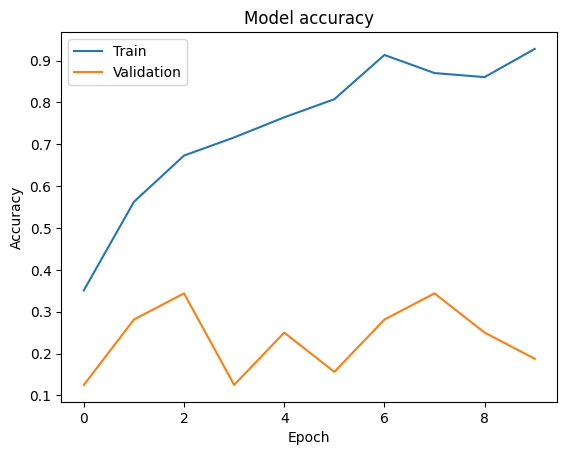

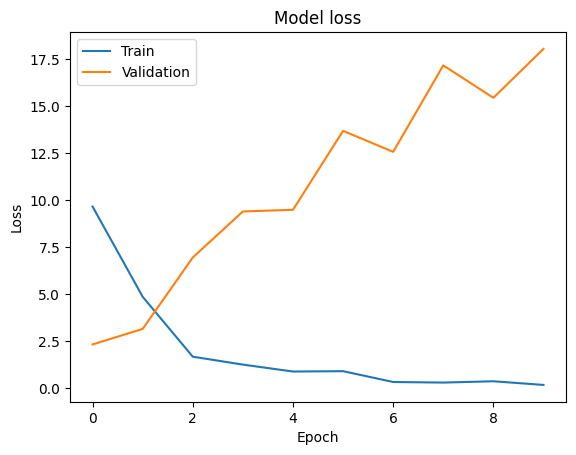

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


10/10 [==============================] - 17s 1s/step


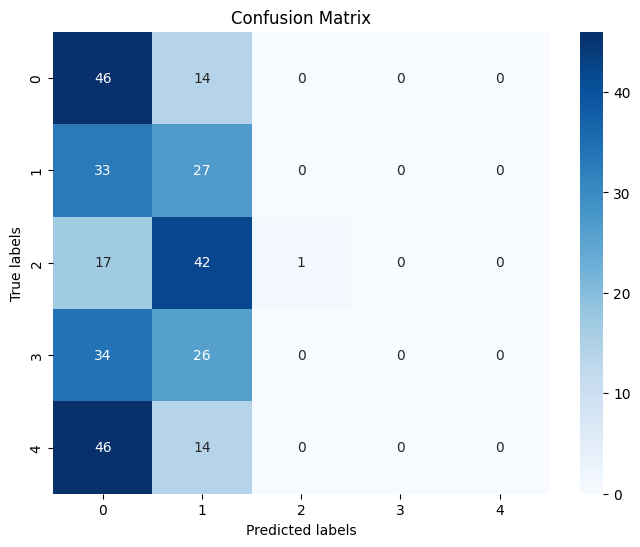

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict classes for the test set
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Get true classes for the test set
y_true = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
